In [58]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import random
import time
from scipy.optimize import fmin

%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.rcParams['font.size'] = 16

def fmin_2d(fun, x1, x2, n_max, plotten):
    x1_x2_liste = np.zeros([n_max + 1,2])
    x1_x2_liste[0]= ([x1,x2])
    
    for n in range(n_max):
        x1 = fmin(lambda x1: fun(x1, x2), x1, disp=0)[0]
        x2 = fmin(lambda x2: fun(x1, x2), x2, disp=0)[0]
        x1_x2_liste[n+1]= ([x1,x2])
    
    if plotten:
        fig, ax1 = plt.subplots()
        ax1.plot(x1_x2_liste[:,0], "x", c="C0")
        ax1.set_xlabel('Schritte')
        ax1.set_ylabel('Parameter 1', color="C0")
        ax1.tick_params('y', colors="C0")
        ax2 = ax1.twinx()
        ax2.plot(x1_x2_liste[:,1], "x", c="C1")
        ax2.set_ylabel('Parameter 2', color="C1")
        ax2.tick_params('y', colors="C1")
        fig.tight_layout()
        plt.show()
    return x1, x2

# Aufgabe 3.1

In [2]:
n = 1000
realisierungen = 10000
εs =  [0.1, 0.2, 0.3, 0.4]
l_n = np.ones(n)
finale_Punkte = np.zeros([len(εs), realisierungen])
t_0 = time.time()
for εi, ε in enumerate(εs):
    for ri, r in enumerate(range(realisierungen)):
        r_n = np.random.rand(n)
        for step in range(len(r_n)-1):
            if round(r_n[step] + ε) == 1:
                l_n[step+1] = l_n[step]
            else:
                if l_n[step] == 1: 
                    l_n[step+1] = -1
                else :
                    l_n[step+1] = 1
        finale_Punkte[εi, ri] = (sum(l_n))
print(time.time()- t_0)

84.53037881851196


In [3]:
normal_distribution = lambda x, D, x_bar: 1/np.sqrt(2 * np.pi * D * n) * np.exp(-(x - n * x_bar)**2/(2 * D * n))

def fehlera(a,ii):
    hist = np.histogram(finale_Punkte[ii], normed=True, bins=50)
    x_bin = [hist[1][0] + 0.5*(hist[1][1]-hist[1][0]) + x*(hist[1][1]-hist[1][0]) for x in range(hist[0].shape[0])]
    y_bin = hist[0]
    b = -0.5*a
    D = a**2/12
    x_bar = 0.5 * a + b
    y_gauß = normal_distribution(np.array(x_bin), D, x_bar)
    delta = (y_gauß - y_bin)**2
    return sum(delta)

def fehlerab(a,b):
    hist = np.histogram(finale_Punkte[ii], normed=True, bins=50)
    x_bin = [hist[1][0] + 0.5*(hist[1][1]-hist[1][0]) + x*(hist[1][1]-hist[1][0]) for x in range(hist[0].shape[0])]
    y_bin = hist[0]
    D = a**2/12
    x_bar = 0.5 * a + b

    y_gauß = normal_distribution(np.array(x_bin), D, x_bar)
    delta = (y_gauß - y_bin)**2
    return sum(delta)

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.1 4.3169276690483125 -2.1575683593750017 1.5529887083162413 0.0008954751491545565
0.2 5.246169305885374 -2.6210369678115844 2.293524365501152 0.00204768513110265
0.3 6.960281965712147 -3.47606746629401 4.037127086851479 0.0040735165620633396
0.4 10.553421421492851 -5.270213011598823 9.281225308302016 0.006497699147602454


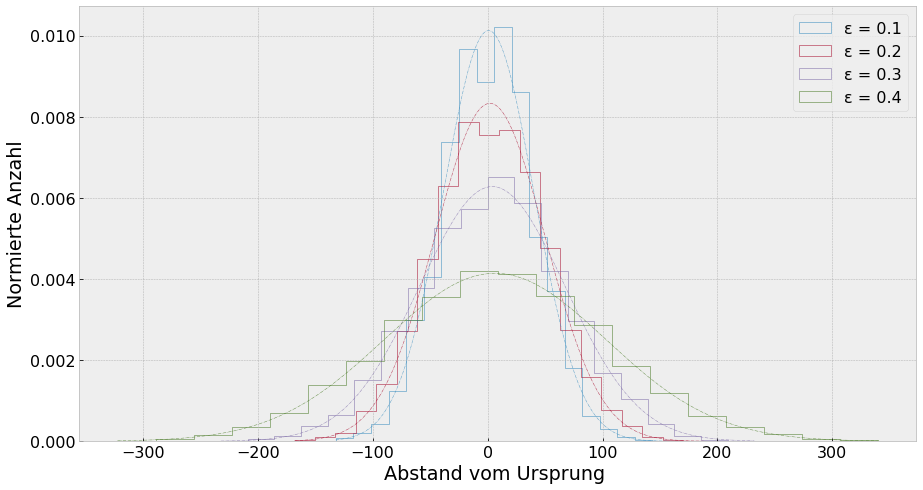

In [50]:
a = 3
b = -1.5

for ii, i in enumerate(finale_Punkte):
    plt.hist(i, histtype='step', bins = 20, normed=True, label="ε = %.1f"%εs[ii], color = "C%i"%ii,)

    x = np.linspace(i.min(), i.max(), 300)
    
    a = fmin(lambda a: fehlera(a, ii), a, disp=0)[0]
    b = -0.5*a
    a, b = fmin_2d(fehlerab, a, b, 10, 0)
    D = a**2/12
    x_bar = 0.5 * a + b
    print(εs[ii], a, b, D, x_bar)

    plt.plot(x, normal_distribution(x, D, x_bar), ls='-.', lw = 0.5, c = "C%i"%ii, alpha =0.8)

    plt.xlabel("Abstand vom Ursprung ")
plt.ylabel("Normierte Anzahl")

plt.legend()
plt.show()

In [48]:
for q in range(4):
    print(np.mean(finale_Punkte[q]**2)/(2*n))

0.7556428
1.1554449999999998
1.9823918
4.591980400000001


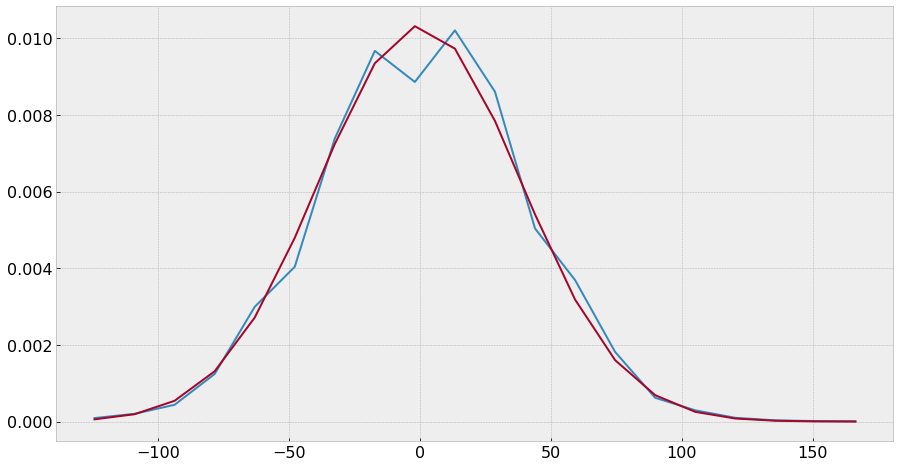

In [5]:
a= 4.23
b = -0.5*a
D = a**2/12
x_bar = 0.5 * a + b

hist = np.histogram(finale_Punkte[0], normed=True, bins=20)
x_bin = [hist[1][0] + 0.5*(hist[1][1]-hist[1][0]) + x*(hist[1][1]-hist[1][0]) for x in range(hist[0].shape[0])]
y_bin = hist[0]
y_gauß = normal_distribution(np.array(x_bin), D, x_bar)

plt.plot(x_bin, y_bin)
plt.plot(x_bin, y_gauß)
delta = (y_gauß - y_bin)**2


In [6]:
hist[1][1] -hist[1][0]

15.299999999999997

In [7]:
range(hist[0].shape[0])

range(0, 20)

In [8]:
normal_distribution(np.array(x_bin), 1, 2), normal_distribution(np.array(x_bin), 10, 100)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]))

In [9]:
hist

(array([9.15032680e-05, 2.02614379e-04, 4.37908497e-04, 1.24183007e-03,
        2.99346405e-03, 4.03921569e-03, 7.38562092e-03, 9.67320261e-03,
        8.86274510e-03, 1.02091503e-02, 8.60784314e-03, 5.03921569e-03,
        3.69281046e-03, 1.81699346e-03, 6.20915033e-04, 2.94117647e-04,
        9.80392157e-05, 3.26797386e-05, 1.30718954e-05, 6.53594771e-06]),
 array([-132. , -116.7, -101.4,  -86.1,  -70.8,  -55.5,  -40.2,  -24.9,
          -9.6,    5.7,   21. ,   36.3,   51.6,   66.9,   82.2,   97.5,
         112.8,  128.1,  143.4,  158.7,  174. ]))

In [10]:
hist = np.histogram(finale_Punkte[0], normed=True)

var = 0
for i in range(len(hist[0])):
        var += hist[0][i]*hist[1][i]/n
var, var

(-0.0004561254901960782, -0.0004561254901960782)

In [11]:
varn = 0
for i in range(len(hist[0])):
        varn += hist[0][i]**2*hist[1][i]/n
varn, varn

(-3.360260335768293e-06, -3.360260335768293e-06)

In [12]:
np.sqrt(3)

1.7320508075688772

# Aufgabe 3.2

In [52]:
schritte = 50000
bines = 25
namen = ["x_1", "x_2", "x_3"]

In [53]:
φ = (np.random.rand() * 180 - 90) * np.pi / 180
θ = np.arccos((np.random.rand() * 360 - 180) * np.pi / 180)

while 1:
    print(φ!=φ,"test", θ!=θ)
    φ = (np.random.rand() * 180 - 90) * np.pi / 180
    θ = np.arccos((np.random.rand() * 360 - 180) * np.pi / 180)
    if φ==φ and θ==θ:
        break
θ, φ, print(θ!=θ)

False test True
False


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


(1.0761886073564169, -0.3893211606893715, None)

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


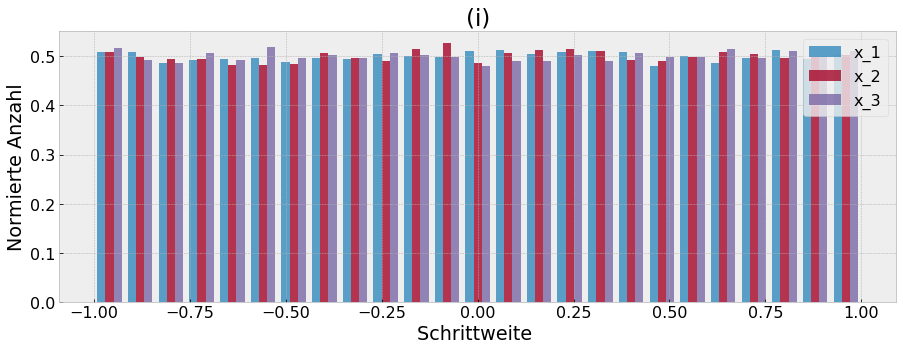

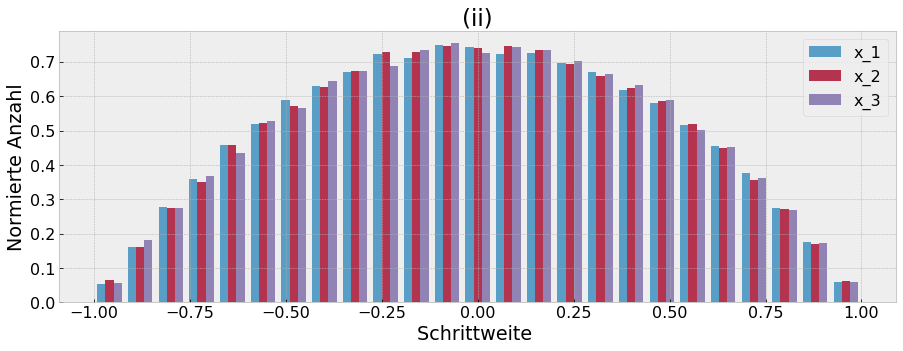

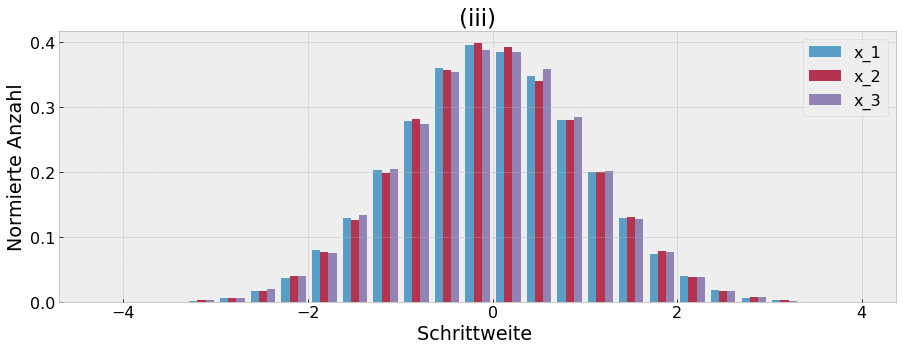

In [65]:
liste_x_i   = np.zeros([schritte,3])
liste_x_ii  = np.zeros([schritte,3])
liste_x_iii = np.zeros([schritte,3])
###########################################################################
for i in range(schritte):
#    while 1:
#        φ = np.arcsin(np.random.rand() * np.pi)
#        θ = np.arccos(np.random.rand() * 2 * np.pi)
#        if φ==φ and θ==θ:
#            break
    θ = np.arccos((np.random.rand() * 2)-1)
    φ = np.random.rand() * 2 * np.pi
    liste_x_i[i] = [np.sin(θ)*np.cos(φ), np.sin(θ)*np.sin(φ), np.cos(θ)]
plt.hist(liste_x_i,alpha=0.8, normed=True, bins = bines, label= namen)
plt.legend(), plt.title("(i)"),     plt.xlabel("Schrittweite ")
plt.ylabel("Normierte Anzahl")
plt.show()
###########################################################################
i = 0
while i!=schritte:
    x = np.random.rand(3)*2 - 1
    norm_x = np.sqrt(x[0]*x[0] +x[1]*x[1] +x[2]*x[2])#np.linalg.norm(x)
    n = x/norm_x
    if norm_x < 1:
        liste_x_ii[i] = x 
        i += 1
#plt.hist(np.sum(liste_x_i, axis=1))
#plt.show()
plt.hist(liste_x_ii, alpha=0.8, normed=True, bins = bines, label= namen)
plt.legend(), plt.title("(ii)"),    plt.xlabel("Schrittweite ")
plt.ylabel("Normierte Anzahl")
plt.show()
###########################################################################
for i in range(schritte):
    x = np.random.randn(3)
    norm_x = np.linalg.norm(x)
    n = x/norm_x
    liste_x_iii[i] = x 
plt.hist(liste_x_iii,alpha=0.8, normed=True, bins = bines, label= namen)
plt.legend(), plt.title("(iii)"),    plt.xlabel("Schrittweite ")
plt.ylabel("Normierte Anzahl")

plt.show()

In [29]:
walks = 1000
schritte = 1000
finaler_punkt_i = []
finaler_punkt_ii = []
finaler_punkt_iii = []

for l in range(walks):
    liste_x_i   = np.zeros([schritte,3])
    liste_x_ii  = np.zeros([schritte,3])
    liste_x_iii = np.zeros([schritte,3])

    for i in range(schritte):
        θ = np.arccos((np.random.rand() * 2)-1)
        φ = np.random.rand() * 2 * np.pi
        liste_x_i[i] = [np.sin(θ)*np.cos(φ), np.sin(θ)*np.sin(φ), np.cos(θ)]
    i = 0
    while i!=schritte:
        x = np.random.rand(3)*2 - 1
        norm_x = np.sqrt(x[0]*x[0] +x[1]*x[1] +x[2]*x[2])#np.linalg.norm(x)
        n = x/norm_x
        if norm_x < 1 or 1:
            liste_x_ii[i] = x 
            i += 1
    for i in range(schritte):
        x = np.random.randn(3)
        norm_x = np.linalg.norm(x)
        n = x/norm_x
        liste_x_iii[i] = x 
    finaler_punkt_i.append(np.linalg.norm(np.sum(liste_x_i, axis=0)**2))
    finaler_punkt_ii.append(np.linalg.norm(np.sum(liste_x_ii, axis=0)**2))
    finaler_punkt_iii.append(np.linalg.norm(np.sum(liste_x_iii, axis=0)**2))

In [31]:
D_i = np.mean(finaler_punkt_i) / (2 * schritte)
D_ii = np.mean(finaler_punkt_ii) / (2 * schritte)
D_iii = np.mean(finaler_punkt_iii) / (2 * schritte)
D_i, D_ii, D_iii

(0.40356862152827483, 0.3815317926325919, 1.2004843694838014)

# Aufgabe 3.3

In [16]:
x = np.linspace(-10, 10)
a, b = 2,2
V = (1 − np.cos 2ωt)(a cos x + b cos 2x)

SyntaxError: invalid character in identifier (<ipython-input-16-36e2cc9de05d>, line 3)

In [ ]:
X = np.random.rand(10000)
x = np.arccos(X)
#x = 2/np.pi/np.sqrt(1-X**2)
liste = []
for i in x:
    if i==i:
        liste.append(i)
plt.hist(np.cos(liste), bins=40)